In [1]:
import pandas as pd
file_path = "Observations 2012-2025.xlsx"
df = pd.read_excel(file_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      float64
 1   Unnamed: 1        0 non-null      float64
 2   Aigrette bleue    86 non-null     object 
 3   Egretta caerulea  86 non-null     object 
 4   Migrateur         85 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.5+ KB


## NOM FRANCAIS

In [20]:
# 定义完整的列名列表
column_names = [
    'Nom_observateur',
    'code_departement', 
    'Nom_transect',
    'date',
    'passage',  # 1er, 2e ou 3e passage
    'nuages',
    'pluie', 
    'vent',
    'visibilite',
    'N_point',
    'heure_debut',
    'ESPECE',
    'dist_25m_Auditif',
    'dist_25m_Visuel',
    'dist_50m_Auditif', 
    'dist_50m_Visuel',
    'dist_100m_Auditif',
    'dist_100m_Visuel',
    'dist_plus100m_Auditif',
    'dist_plus100m_Visuel',
    'vol',
    'total_Auditif',
    'total_Visuel_sans_vol',
    'total_AV_sans_vol',
    'total_AV_avec_vol'
]

In [28]:
obs_data = pd.read_excel(
    file_path,
    sheet_name='NOM FRANÇAIS',
    header=None,      
    skiprows=3,       
    names=column_names,
    index_col=False
)

In [29]:
obs_data.shape

(114495, 25)

In [31]:
obs_data.head()

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_50m_Visuel,dist_100m_Auditif,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol
0,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0
1,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1,1.0
2,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2,2.0
3,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0
4,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0


## ESPECES

In [37]:
# ESPECES表的列名定义
species_column_names = [
    'nom_francais',     # 法语名称 
    'nom_scientifique', # 学名 
    'statut_migratoire' # 迁徙状态 
]

# 读取ESPECES工作表
species_data = pd.read_excel(file_path, sheet_name='ESPECES', header=0, names=species_column_names)

species_data.head()

,nom_francais,nom_scientifique,statut_migratoire
0,Aigrette garzette,Egretta garzetta,Migrateur
1,Aigrette neigeuse,Egretta thula,Migrateur
2,Aigrette tricolore,Egretta tricolor ruficollis,Migrateur
3,Amazone aourou,Amazona amazonica,Exogène introduit par l'homme
4,Astrild à joues orange,Estrilda melpoda,NaN


## GPS-MILIEU

In [38]:
# GPS-MILIEU表的列名定义
site_column_names = [
    'transect_name',    # 样线名称 (如 Aéroport)
    'utm_x',           # UTM X坐标 (如 714593)
    'utm_y',           # UTM Y坐标 (如 1614233)
    'habitat_type',    # 栖息地类型 (如 Mangrove)
    'site_id',         # 站点ID (如 S1)
    'point_id'         # 点位ID (如 SIPI, S1P2)
]

In [43]:
site_data = pd.read_excel(file_path, sheet_name='GPS-MILIEU',skiprows=2, names=site_column_names)

In [47]:
site_data.head()

,transect_name,utm_x,utm_y,habitat_type,site_id,point_id
0,Aéroport,714416,1614194,Mangrove,S1,S1P2
1,Aéroport,714133,1614141,Mangrove,S1,S1P3
2,Aéroport,713914,1614103,Mangrove,S1,S1P4
3,Aéroport,713719,1614062,Mangrove,S1,S1P5
4,Aéroport,713559,1614036,Mangrove,S1,S1P6


## 1.1 Overview of the dataset structure

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Load and inspect dataset ==========
# 读取观测数据
# obs_data = pd.read_excel(
#     file_path,
#     sheet_name='NOM FRANÇAIS',
#     header=2,
#     names=column_names,
#     index_col=None
# ).dropna(axis=1, how='all')  # 删除空白列

# 打印基本结构信息（表格维度、列名等）
print("=== Dataset Overview ===")
print(f"Shape (rows, columns): {obs_data.shape}")
# print(f"Columns: {list(obs_data.columns)}")

# 检查时间范围
obs_data['date'] = pd.to_datetime(obs_data['date'], errors='coerce')
time_min, time_max = obs_data['date'].min(), obs_data['date'].max()
print(f"Date range: {time_min.date()} to {time_max.date()}")

# 唯一标识符统计（样线、观察者、物种）
unique_transects = obs_data['Nom_transect'].nunique()
unique_observers = obs_data['Nom_observateur'].nunique()
unique_species = obs_data['ESPECE'].nunique()
print(f"Unique transects: {unique_transects}")
print(f"Unique observers: {unique_observers}")
print(f"Unique species: {unique_species}")



=== Dataset Overview ===
Shape (rows, columns): (114495, 25)
Date range: 2014-03-29 to 2025-07-03
Unique transects: 74
Unique observers: 49
Unique species: 103


## 1.2. Observation effort overview 努力量


## Calculate and visualise observation effort over time and across transects.
## 计算并可视化时间和样线维度上的观测努力量

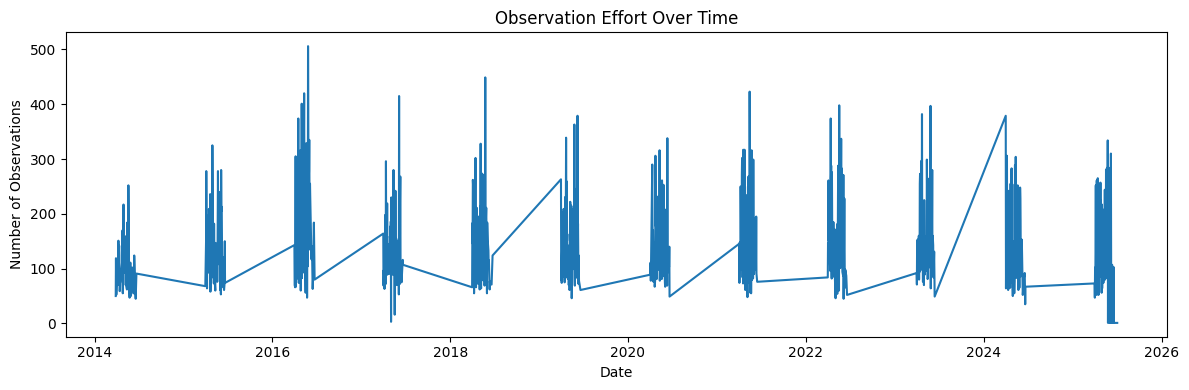

In [53]:
# 2.1 Effort over time (number of observations per day)
# 时间维度上的努力量（每日观测记录数）
effort_by_date = obs_data.groupby('date').size().reset_index(name='n_observations')

plt.figure(figsize=(12, 4))
sns.lineplot(data=effort_by_date, x='date', y='n_observations')
plt.title("Observation Effort Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Observations")
plt.tight_layout()
plt.show()

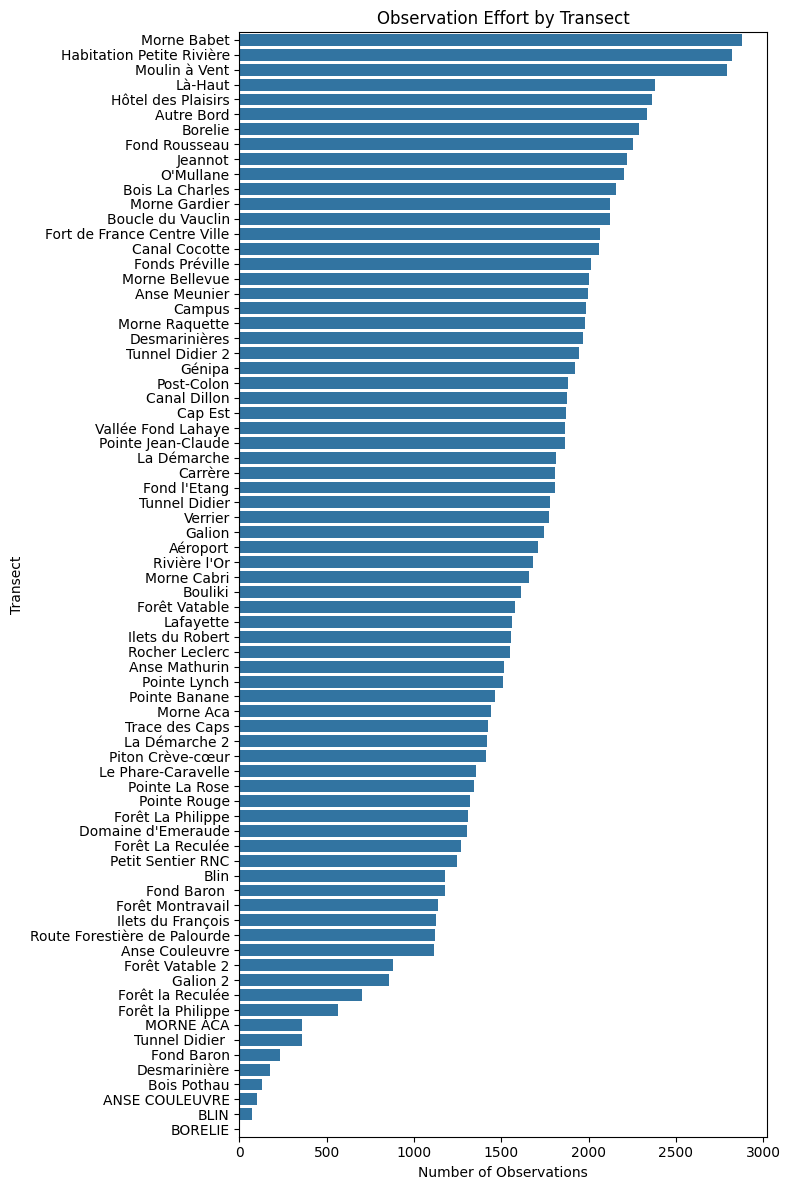

In [55]:
# 2.2 Effort by transect (number of observations per transect)
# 样线维度上的努力量（每条样线观测记录数）
effort_by_transect = obs_data.groupby('Nom_transect').size().sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x=effort_by_transect.values, y=effort_by_transect.index)
plt.title("Observation Effort by Transect")
plt.xlabel("Number of Observations")
plt.ylabel("Transect")
plt.tight_layout()
plt.show()

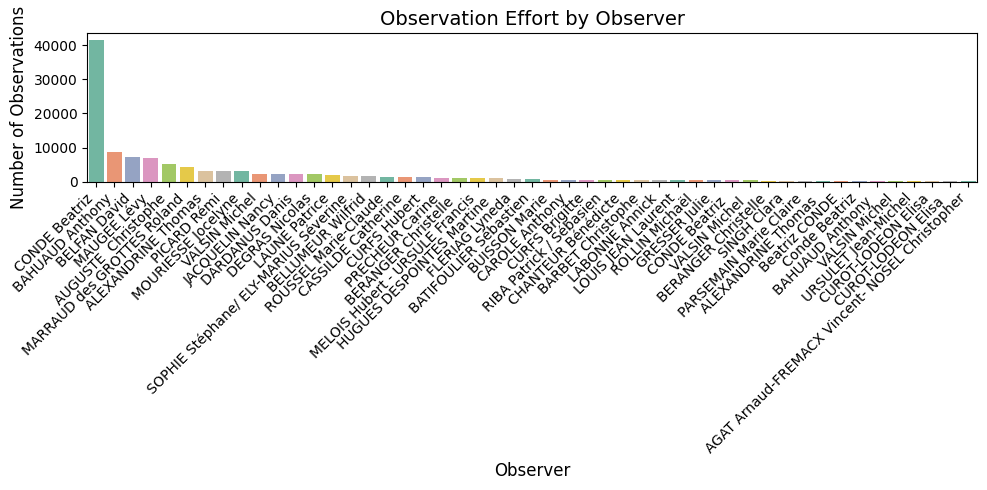

In [68]:
# 2.3 Effort by observer
# 观察者努力量 / 每位观察者观测次数

# 计算每位观察者的观测次数 / Count observations per observer
effort_by_observer = obs_data['Nom_observateur'].value_counts()

# 将 Series 转为 DataFrame / Convert Series to DataFrame
observer_df = effort_by_observer.reset_index()
observer_df.columns = ['Observer', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(
    x='Observer',
    y='Count',
    data=observer_df,
    hue='Observer',   # 使用 hue 兼容 seaborn 未来版本
    dodge=False,      # 不拆分箱体
    palette="Set2",
    legend=False      # 隐藏图例
)
plt.title("Observation Effort by Observer", fontsize=14)
plt.xlabel("Observer", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [69]:
# ## 3. Distribution of species counts
# ## 3. 物种计数分布
# Descriptive statistics for numeric variables related to counts.
# 对计数相关的数值列进行描述性统计

# %%
# Define numeric columns
# 定义数值列 / numeric columns for counts
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Convert numeric columns
# 转换为数值类型 / convert to numeric
obs_data[count_cols] = obs_data[count_cols].apply(pd.to_numeric, errors='coerce')

# Summary statistics
# 数值列描述性统计 / descriptive statistics
count_summary = obs_data[count_cols].describe().T
print("=== Descriptive Statistics for Counts===")
count_summary


=== Descriptive Statistics for Counts===


,count,mean,std,min,25%,50%,75%,max
dist_25m_Auditif,58829.0,1.619694,0.960943,0.000000,1.0,1.0,2.0,40.0
dist_25m_Visuel,39190.0,2.011687,2.567085,0.000000,1.0,1.0,2.0,121.0
dist_50m_Auditif,31148.0,1.298831,0.681653,0.000000,1.0,1.0,1.0,23.0
dist_50m_Visuel,5432.0,2.051178,3.573717,0.000000,1.0,1.0,2.0,100.0
dist_100m_Auditif,8402.0,1.235777,0.667929,0.000000,1.0,1.0,1.0,22.0
dist_100m_Visuel,1531.0,1.951012,4.316356,0.000000,1.0,1.0,2.0,150.0
dist_plus100m_Auditif,2648.0,1.305136,3.979901,0.000000,1.0,1.0,1.0,200.0
dist_plus100m_Visuel,1388.0,4.189481,12.844451,0.000000,1.0,1.0,3.0,200.0
vol,1821.0,1.983526,4.056436,0.000000,1.0,1.0,2.0,80.0
total_Auditif,114255.0,1.305836,1.339722,0.000000,1.0,1.0,2.0,200.0


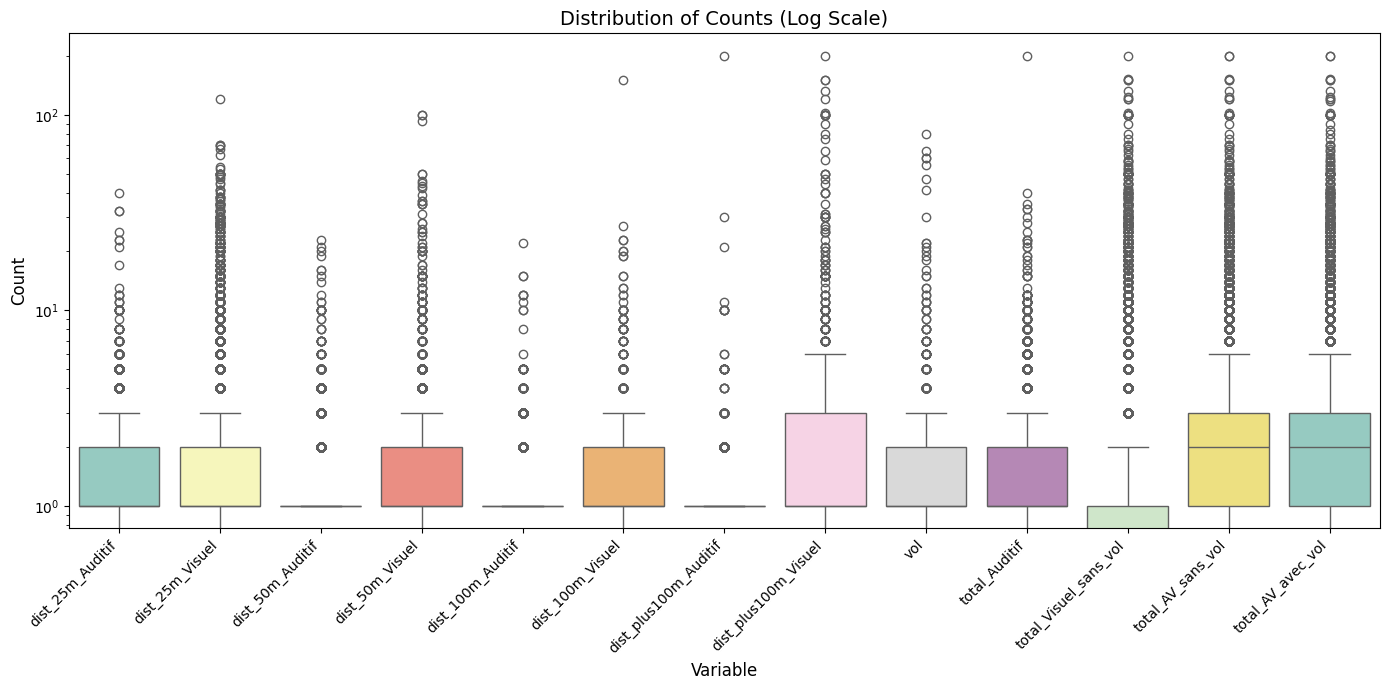

In [60]:
# %% [markdown]
# ## 3. Improved Distribution of Species Counts
# ## 3. 改进版物种计数分布
# Boxplot with log scale and outliers highlighted for better visualisation.
# 带对数刻度和异常值的箱线图，更清晰展示各计数变量分布

# %%
plt.figure(figsize=(14, 7))

# Melt dataframe for plotting
# 将宽表转成长表 / convert wide to long format
melted_counts = obs_data[count_cols].melt(var_name='Variable', value_name='Value')

# Draw boxplot
# 绘制箱线图 / boxplot
sns.boxplot(
    x='Variable',
    y='Value',
    data=melted_counts,
    hue='Variable',       # 使用 hue 指定颜色
    palette="Set3",
    showfliers=True,
    dodge=False,          # 合并箱体，避免重复
    legend=False          # 不显示图例
)

# Set log scale for y-axis
# y轴对数刻度 / log scale
plt.yscale('log')

# Rotate x-axis labels for readability
# 旋转 x 轴标签 / rotate labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Titles and labels
plt.title("Distribution of Counts (Log Scale)", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [70]:
# ## 4. Weather conditions
# ## 4. 天气条件
# Distribution of environmental descriptors such as clouds, rain, wind, and visibility.
# 天气相关变量（云量、降雨、风力、能见度）的分布

# %%
# Convert weather columns to numeric
# 转换为数值类型 / convert to numeric
weather_cols = ['nuages', 'pluie', 'vent', 'visibilite']
obs_data[weather_cols] = obs_data[weather_cols].apply(pd.to_numeric, errors='coerce')


# Summary statistics
# 描述性统计 / descriptive statistics
weather_summary = obs_data[weather_cols].describe().T
print("=== Weather Conditions Summary / 天气条件描述性统计 ===")
weather_summary

=== Weather Conditions Summary / 天气条件描述性统计 ===


,count,mean,std,min,25%,50%,75%,max
nuages,114493.0,1.968181,0.698651,1.0,1.0,2.0,2.0,3.0
pluie,114494.0,1.029355,0.177576,1.0,1.0,1.0,1.0,3.0
vent,114478.0,1.422885,0.600866,-5.0,1.0,1.0,2.0,3.0
visibilite,114494.0,1.419559,0.619856,1.0,1.0,1.0,2.0,4.0


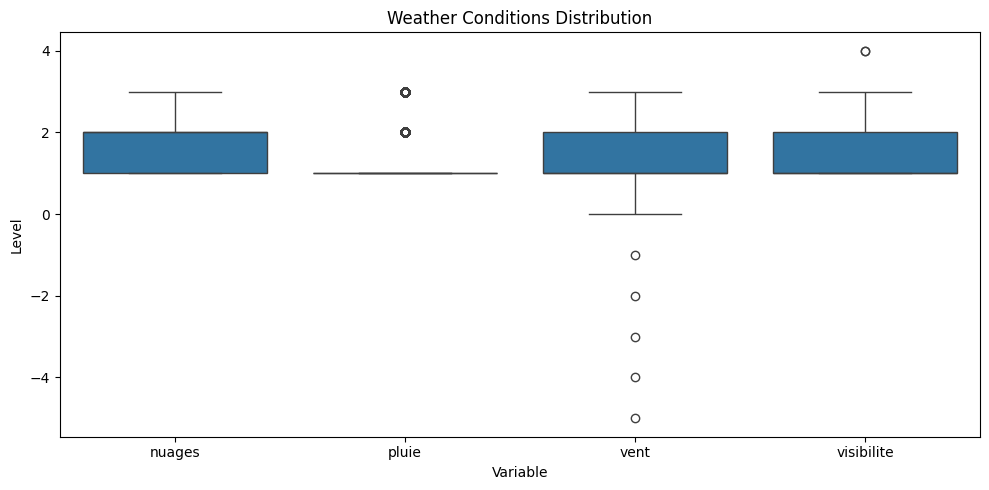

In [71]:
# Boxplot for weather variables
# 天气条件箱线图 / boxplot
plt.figure(figsize=(10, 5))
melted_weather = obs_data[weather_cols].melt(var_name='Variable', value_name='Level')
sns.boxplot(x='Variable', y='Level', data=melted_weather)
plt.title("Weather Conditions Distribution")
plt.ylabel("Level")
plt.xlabel("Variable")
plt.tight_layout()
plt.show()

In [82]:
# ## 5. Data Quality Check
# ## 5. 数据质量检查
# Check missing values, negative counts, and duplicates.

# %%
# 5.1 Missing values
# 缺失值 / missing value ratio
missing_pct = obs_data.isnull().mean().sort_values(ascending=False) * 100
# 每列缺失值比例
print("=== Missing value ratio per column (%)===")
print(missing_pct)


=== Missing value ratio per column (%)===
dist_plus100m_Visuel     98.787720
dist_100m_Visuel         98.662824
vol                      98.409538
dist_plus100m_Auditif    97.687235
dist_50m_Visuel          95.255688
dist_100m_Auditif        92.661688
dist_50m_Auditif         72.795319
dist_25m_Visuel          65.771431
dist_25m_Auditif         48.618717
total_Auditif             0.209616
vent                      0.014848
total_AV_sans_vol         0.005240
total_Visuel_sans_vol     0.003494
nuages                    0.001747
code_departement          0.001747
visibilite                0.000873
pluie                     0.000873
total_AV_avec_vol         0.000000
Nom_observateur           0.000000
ESPECE                    0.000000
heure_debut               0.000000
N_point                   0.000000
passage                   0.000000
date                      0.000000
Nom_transect              0.000000
year                      0.000000
dtype: float64


In [77]:
# 5.2 Negative values
# 负数检测 / check for negative counts
abnormal_counts = {}
for col in count_cols:
    n_neg = (obs_data[col] < 0).sum()
    if n_neg > 0:
        abnormal_counts[col] = n_neg
if abnormal_counts:
    print("Negative values found in columns：", abnormal_counts)
else:
    print("No negative values detected in count columns")


Negative values found in columns： {'total_Visuel_sans_vol': np.int64(4)}


In [78]:
# 5.3 Duplicate entries
# 重复记录 / duplicates
duplicates = obs_data.duplicated(subset=['Nom_transect', 'date', 'N_point', 'ESPECE']).sum()
# 重复记录数
print(f"Duplicate records: {duplicates}")

Duplicate records: 3005


In [79]:
obs_data.duplicated().sum()

np.int64(2243)

In [83]:
obs_data

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_100m_Auditif,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol,year
0,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,2014
1,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,2014
2,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2.0,2.0,2014
3,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,2014
4,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114490,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,2.0,2025
114491,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,2025
114492,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,2.0,2025
114493,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,2.0,NaN,NaN,NaN,NaN,3.0,0.0,3.0,3.0,2025


# Data Preprocessing / 数据预处理
# Clean and prepare the observation dataset before analysis
# 对观测数据进行清理和预处理，为后续分析做准备

In [98]:
import pandas as pd
import numpy as np

# %% [markdown]
# ## 1. Ensure date column is datetime / 确保日期列为 datetime 类型

# %%
obs_data_cleaned = obs_data.copy()  # Copy original data / 复制原始数据
obs_data_cleaned['date'] = pd.to_datetime(obs_data_cleaned['date'], errors='coerce')
print(f"Missing dates : {obs_data_cleaned['date'].isna().sum()}")

# %% [markdown]
# ## 2. Convert numeric columns / 转换数值列为数值型

# %%
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Convert to numeric, coerce errors to NaN / 转换为数值型，无法转换的设为 NaN
obs_data_cleaned[count_cols] = obs_data_cleaned[count_cols].apply(pd.to_numeric, errors='coerce')

# Check missing values / 检查缺失值
missing_counts = obs_data_cleaned[count_cols].isna().sum()
print("Missing values in count columns :\n", missing_counts)



Missing dates : 0
Missing values in count columns :
 dist_25m_Auditif          55666
dist_25m_Visuel           75305
dist_50m_Auditif          83347
dist_50m_Visuel          109063
dist_100m_Auditif        106093
dist_100m_Visuel         112964
dist_plus100m_Auditif    111847
dist_plus100m_Visuel     113107
vol                      112674
total_Auditif               240
total_Visuel_sans_vol         4
total_AV_sans_vol             6
total_AV_avec_vol             0
dtype: int64


In [99]:
# %% [markdown]
# ## 3. Handle missing values / 处理缺失值

# %%
# Remove rows with missing key information (date, transect, point) / 删除关键列缺失行
obs_data_cleaned = obs_data_cleaned.dropna(subset=['date', 'Nom_transect', 'N_point'])

# Fill missing numeric counts with 0 / 数值列缺失值填充为0
obs_data_cleaned[count_cols] = obs_data_cleaned[count_cols].fillna(0)

obs_data_cleaned

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_100m_Auditif,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol,year
0,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014
1,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2014
2,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2014
3,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014
4,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114490,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2025
114491,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2025
114492,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2025
114493,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,2.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,2025


In [100]:
obs_data_cleaned[count_cols].isna().sum()

dist_25m_Auditif         0
dist_25m_Visuel          0
dist_50m_Auditif         0
dist_50m_Visuel          0
dist_100m_Auditif        0
dist_100m_Visuel         0
dist_plus100m_Auditif    0
dist_plus100m_Visuel     0
vol                      0
total_Auditif            0
total_Visuel_sans_vol    0
total_AV_sans_vol        0
total_AV_avec_vol        0
dtype: int64

In [101]:
# %% [markdown]
# ## 4. Remove duplicate records / 删除重复记录

# %%
# Identify duplicates based on transect, date, point, and species / 基于样线、日期、点位、物种和第几次巡查/观测判断重复
obs_data_cleaned.duplicated(subset=['Nom_transect','date','N_point','ESPECE','passage'])
print(f"Number of duplicate rows : {duplicates.sum()}")

# 检查整行是否重复 / Check full row duplicates
full_duplicates = obs_data_cleaned.duplicated()  # 不指定 subset，比较整行
print(f"Number of full duplicate rows : {full_duplicates.sum()}")

Number of duplicate rows : 3005
Number of full duplicate rows : 2243


In [102]:
# 删除整行重复 / Remove full row duplicates
obs_data_cleaned = obs_data_cleaned.drop_duplicates()

In [103]:
obs_data_cleaned.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
114490    False
114491    False
114492    False
114493    False
114494    False
Length: 112252, dtype: bool

In [107]:
# %% [markdown]
# ## 6. Create auxiliary columns / 创建辅助列

# %%
# Extract year and month / 提取年份和月份
# 使用 .loc 显式赋值 / Use .loc to avoid SettingWithCopyWarning
obs_data_cleaned.loc[:, 'year'] = obs_data_cleaned['date'].dt.year
obs_data_cleaned.loc[:, 'month'] = obs_data_cleaned['date'].dt.month

In [108]:
obs_data_cleaned

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol,year,month
0,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014,4
1,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2014,4
2,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2014,4
3,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014,4
4,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114490,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2025,5
114491,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2025,5
114492,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2025,5
114493,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,2025,5


## 处理天气异常值

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/2248936828.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


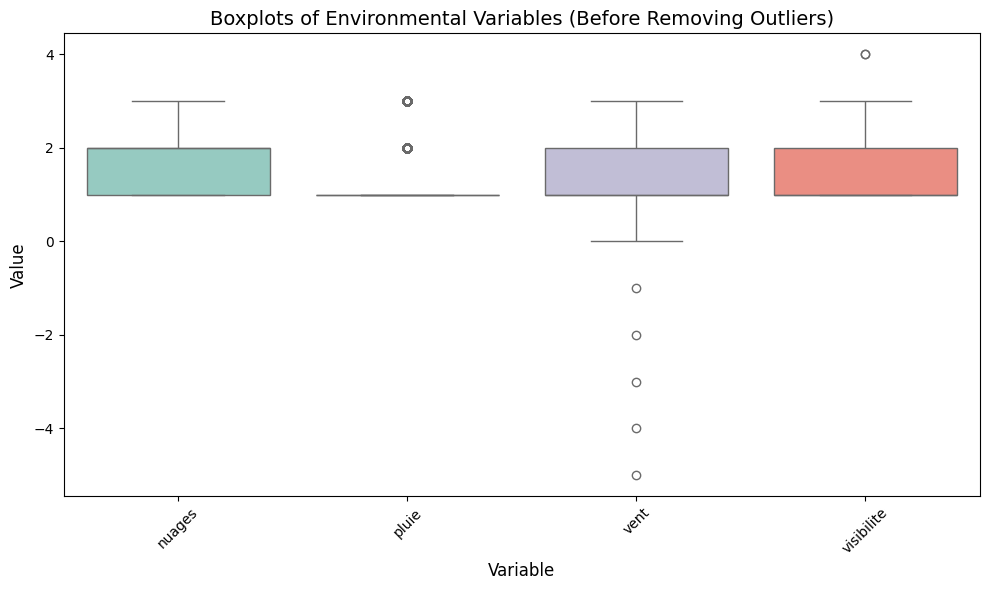

In [113]:
# %% [markdown]
# ## Boxplots of environmental variables / 环境变量箱线图（未删除异常值）
# Visualize distributions of nuages, pluie, vent, visibilite / 可视化云量、降雨、风力、能见度分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Melt dataframe for plotting / 转成长表便于绘图
plot_data = obs_data_cleaned[env_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data,
    palette="Set3"
)
plt.title("Boxplots of Environmental Variables (Before Removing Outliers)", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
# %% [markdown]
# ## Remove outliers in environmental columns / 删除环境列中的异常值
# Use IQR method to filter extreme values / 使用 IQR 方法过滤极端值

# %%
# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Copy the DataFrame to avoid modifying original / 复制一份数据
obs_data_no_outliers = obs_data_cleaned.copy()

for col in env_cols:
    # Convert to numeric in case of strings / 转为数值型
    obs_data_no_outliers[col] = pd.to_numeric(obs_data_no_outliers[col], errors='coerce')
    
    # Calculate Q1, Q3 and IQR / 计算四分位数和 IQR
    Q1 = obs_data_no_outliers[col].quantile(0.25)
    Q3 = obs_data_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds / 定义上下界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers / 删除异常值
    obs_data_no_outliers = obs_data_no_outliers[
        (obs_data_no_outliers[col] >= lower_bound) & (obs_data_no_outliers[col] <= upper_bound)
    ]

# %% [markdown]
# ## Check results / 检查处理后的数据
print("Shape after removing environmental outliers / 删除异常值后数据维度:", obs_data_no_outliers.shape)
print("Remaining environmental data ranges / 剩余环境列范围:")
print(obs_data_no_outliers[env_cols].describe())

Shape after removing environmental outliers / 删除异常值后数据维度: (109139, 27)
Remaining environmental data ranges / 剩余环境列范围:
              nuages     pluie           vent     visibilite
count  109139.000000  109139.0  109139.000000  109139.000000
mean        1.950018       1.0       1.423130       1.400581
std         0.693046       0.0       0.598472       0.604930
min         1.000000       1.0       1.000000       1.000000
25%         1.000000       1.0       1.000000       1.000000
50%         2.000000       1.0       1.000000       1.000000
75%         2.000000       1.0       2.000000       2.000000
max         3.000000       1.0       3.000000       3.000000


/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/3392137475.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


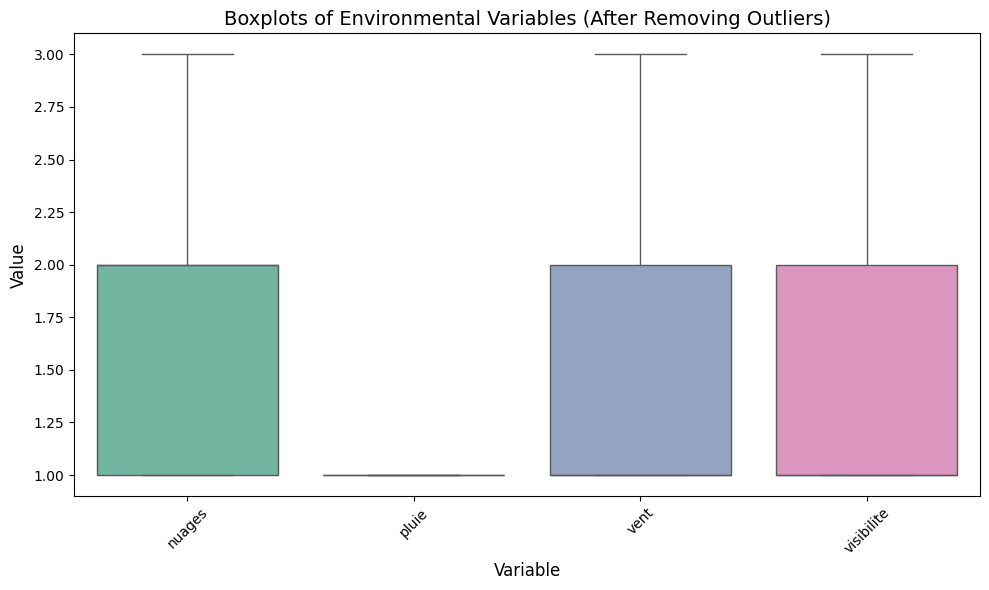

In [116]:
# %% [markdown]
# ## Boxplots of environmental variables after removing outliers / 删除异常值后的环境变量箱线图
# Visualize distributions after outlier removal / 删除异常值后可视化环境列分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Melt dataframe for plotting / 转成长表便于绘图
plot_data_after = obs_data_no_outliers[env_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data_after,
    palette="Set2"
)
plt.title("Boxplots of Environmental Variables (After Removing Outliers)", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 计数异常值处理

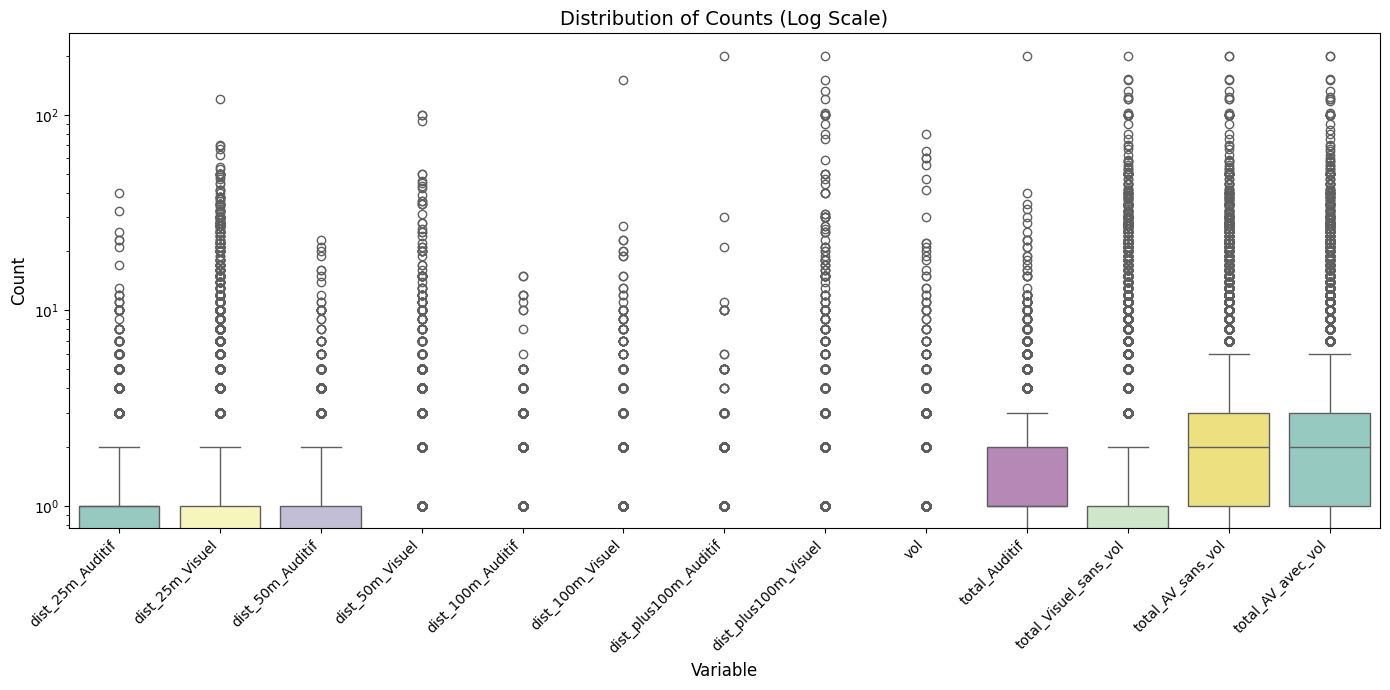

In [118]:
# %% [markdown]
# ## 3. Improved Distribution of Species Counts
# ## 3. 改进版物种计数分布
# Boxplot with log scale and outliers highlighted for better visualisation.
# 带对数刻度和异常值的箱线图，更清晰展示各计数变量分布

# %%
plt.figure(figsize=(14, 7))

# Melt dataframe for plotting
# 将宽表转成长表 / convert wide to long format
melted_counts = obs_data_no_outliers[count_cols].melt(var_name='Variable', value_name='Value')

# Draw boxplot
# 绘制箱线图 / boxplot
sns.boxplot(
    x='Variable',
    y='Value',
    data=melted_counts,
    hue='Variable',       # 使用 hue 指定颜色
    palette="Set3",
    showfliers=True,
    dodge=False,          # 合并箱体，避免重复
    legend=False          # 不显示图例
)

# Set log scale for y-axis
# y轴对数刻度 / log scale
plt.yscale('log')

# Rotate x-axis labels for readability
# 旋转 x 轴标签 / rotate labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Titles and labels
plt.title("Distribution of Counts (Log Scale)", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/1442198535.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


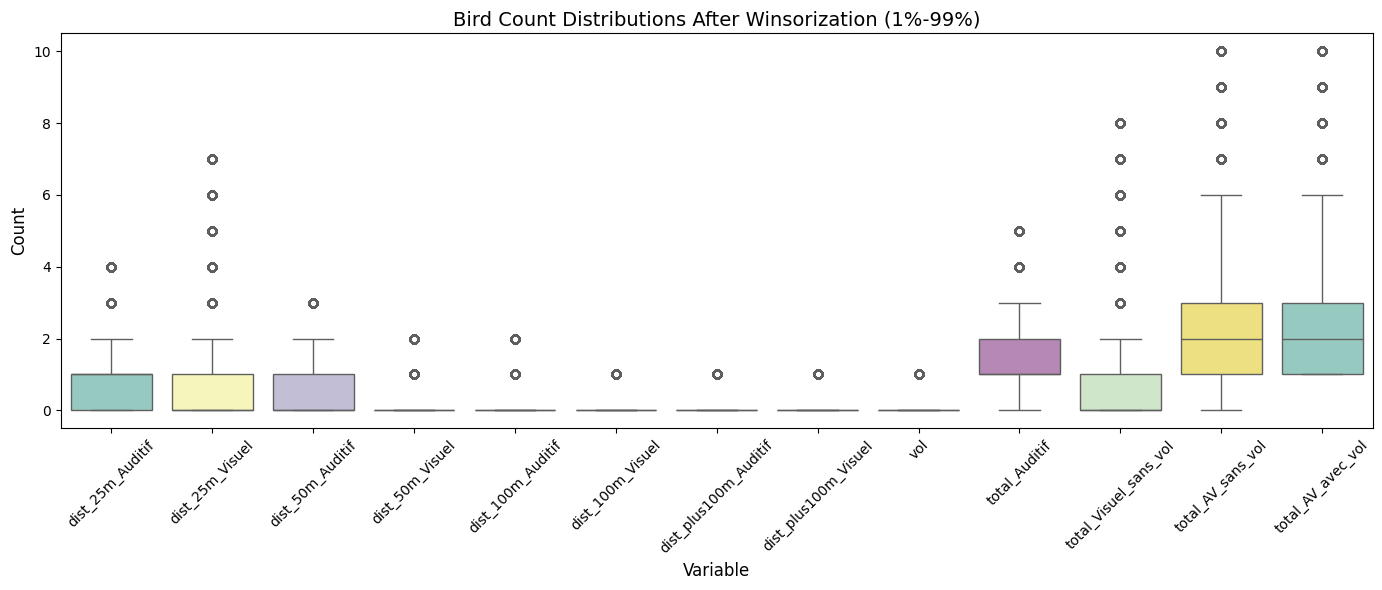

In [124]:
# %% [markdown]
# ## Winsorize bird count columns / 对鸟类计数列进行上下 1% 分位数裁剪
# 将低于 1% 的值设为 1% 分位数，将高于 99% 的值设为 99% 分位数

# %%
import numpy as np

# List of bird count columns / 鸟类计数列
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Copy DataFrame / 复制数据
# obs_data_winsor = obs_data_cleaned.copy()
obs_data_winsor = obs_data_no_outliers.copy()

# Apply winsorization / 上下分位数裁剪
for col in count_cols:
    lower = obs_data_winsor[col].quantile(0.01)  # 1% 分位数
    upper = obs_data_winsor[col].quantile(0.99)  # 99% 分位数
    obs_data_winsor[col] = obs_data_winsor[col].clip(lower, upper)  # 裁剪

# %% [markdown]
# ## Boxplots after winsorization / 上下1%分位数裁剪后的箱线图
# Visualize bird count distributions / 可视化鸟类计数分布

# %%
import seaborn as sns
import matplotlib.pyplot as plt

# Melt dataframe for plotting / 转成长表
plot_data = obs_data_winsor[count_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data,
    palette="Set3"
)
plt.title("Bird Count Distributions After Winsorization (1%-99%)", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

删除异常值后剩余数据量: 106756 条记录


/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/436135774.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/436135774.py:48: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/436135774.py:48: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/436135774.py:48: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/55/d2w0pl9d75786nm3jtbq0cdm0000gn/T/ipykernel_61707/436135774.py:48: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-65

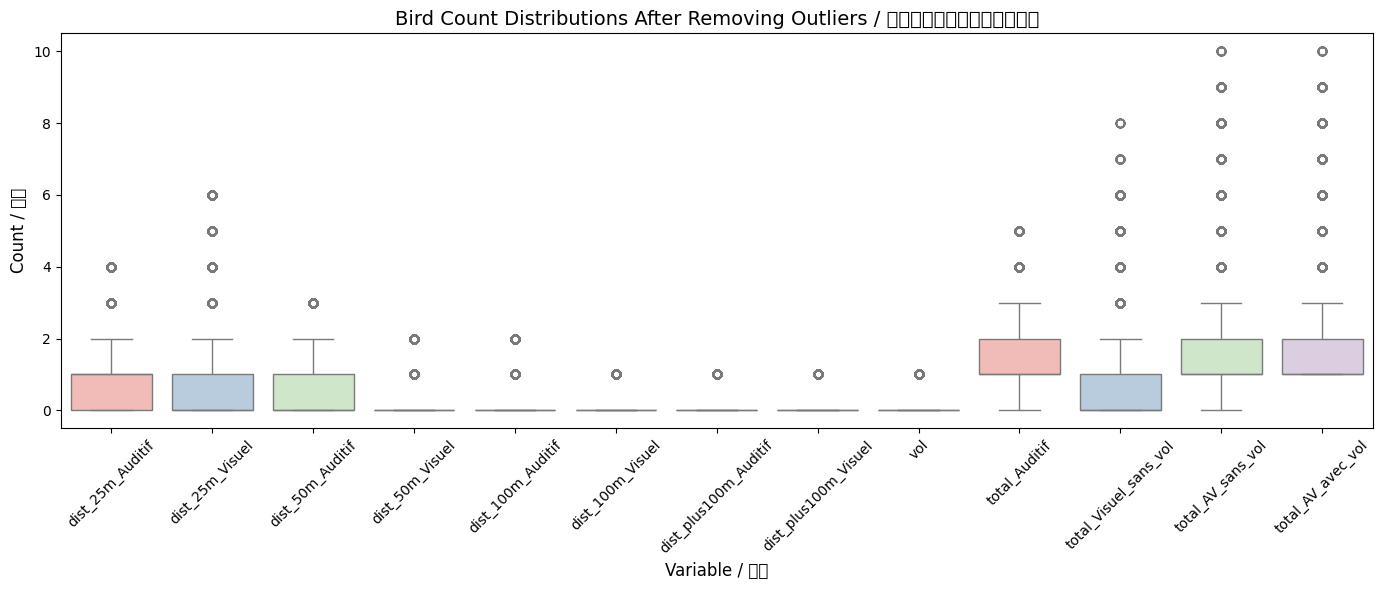

In [125]:
# %% [markdown]
# ## Remove extreme outliers / 删除极端异常值
# 删除所有鸟类计数中任意列低于1%或高于99%分位数的行

# %%
# 复制数据
obs_data_no_outliers = obs_data_cleaned.copy()

# 计算各列的分位数阈值
thresholds = {}
for col in count_cols:
    lower = obs_data_no_outliers[col].quantile(0.01)
    upper = obs_data_no_outliers[col].quantile(0.99)
    thresholds[col] = (lower, upper)

# 逐列筛选，删除超出范围的记录
for col, (lower, upper) in thresholds.items():
    obs_data_no_outliers = obs_data_no_outliers[
        (obs_data_no_outliers[col] >= lower) &
        (obs_data_no_outliers[col] <= upper)
    ]

# 打印删除后的结果
print(f"删除异常值后剩余数据量: {len(obs_data_no_outliers)} 条记录")

# %% [markdown]
# ## Boxplots after removing outliers / 删除异常值后的箱线图

# %%
# 将删除异常值后的数据转成长表
plot_data_no_outliers = obs_data_no_outliers[count_cols].melt(
    var_name='Variable',
    value_name='Value'
)

# 绘制箱线图
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data_no_outliers,
    palette="Pastel1"
)
plt.title("Bird Count Distributions After Removing Outliers / 删除异常值后的鸟类计数分布", fontsize=14)
plt.ylabel("Count / 计数", fontsize=12)
plt.xlabel("Variable / 变量", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

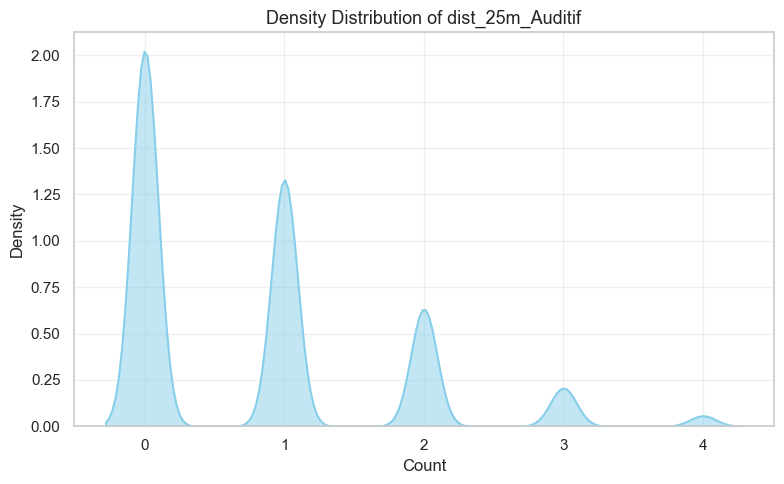

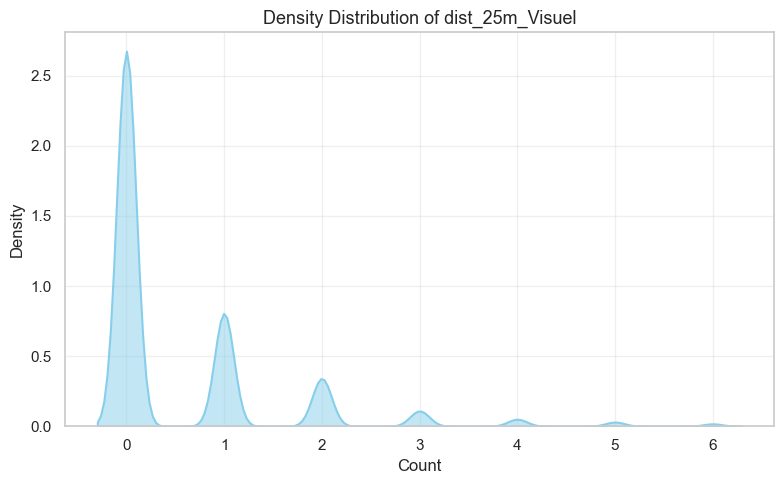

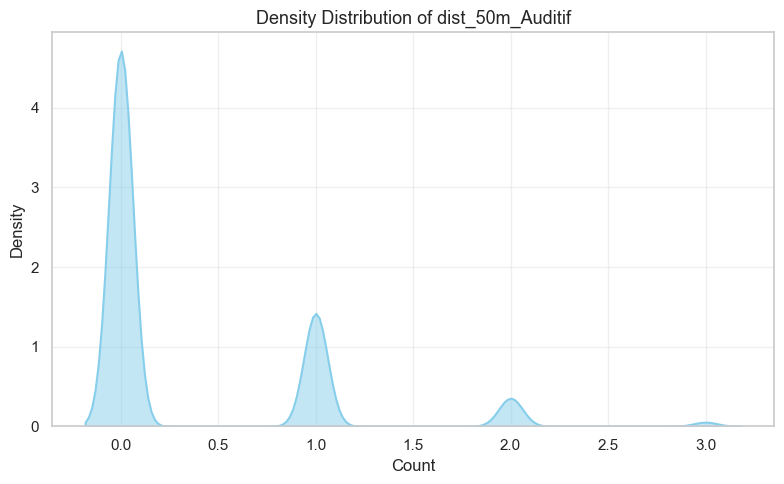

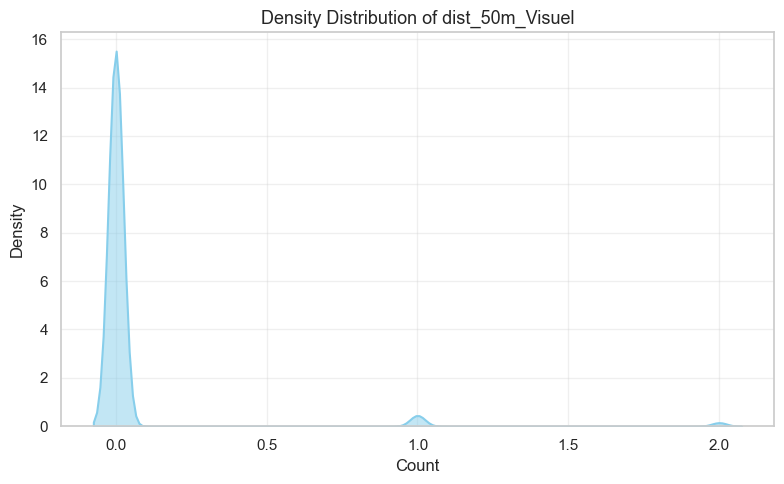

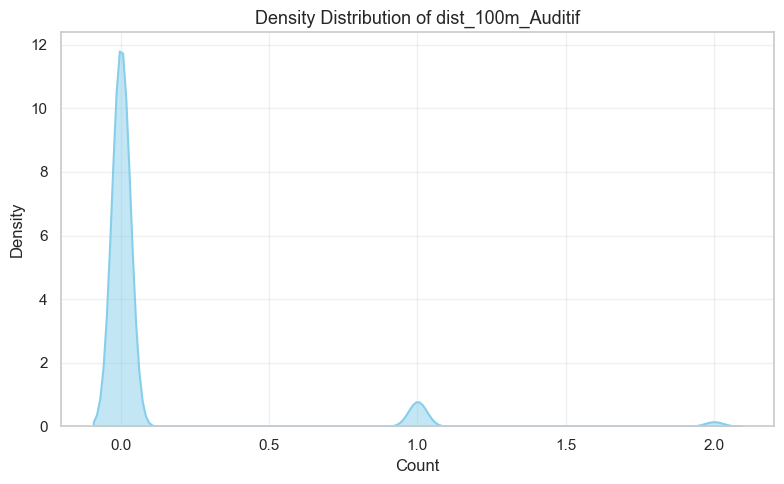

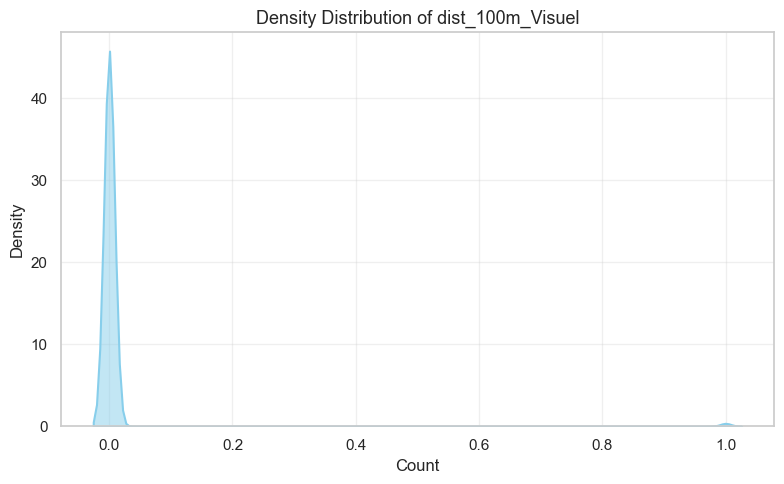

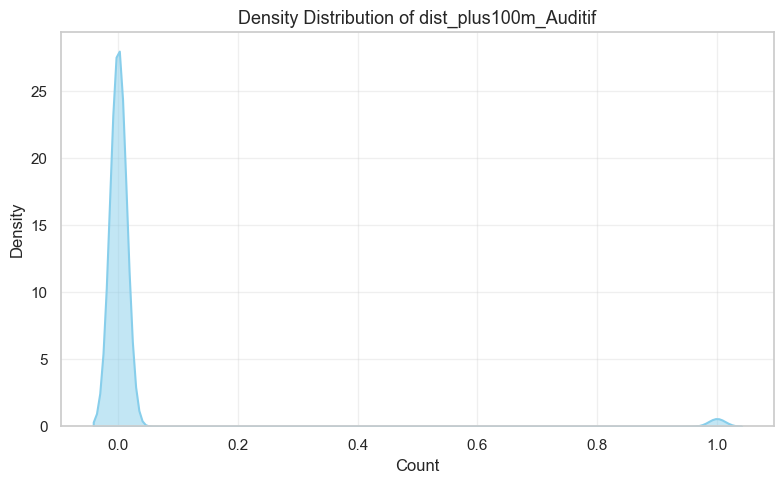

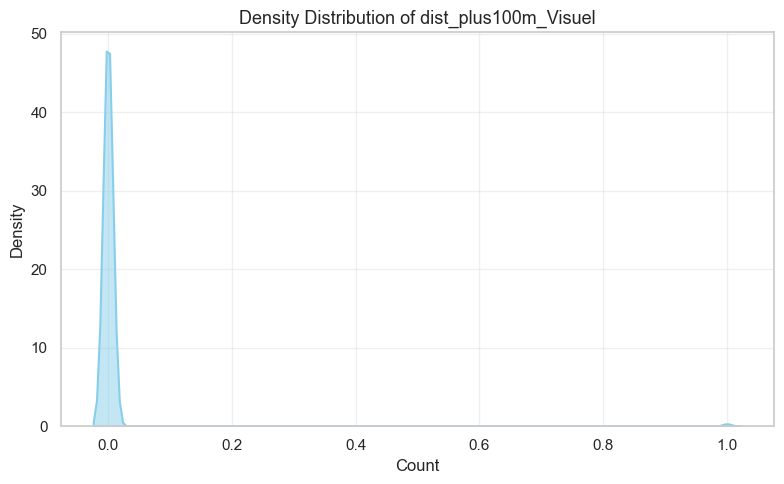

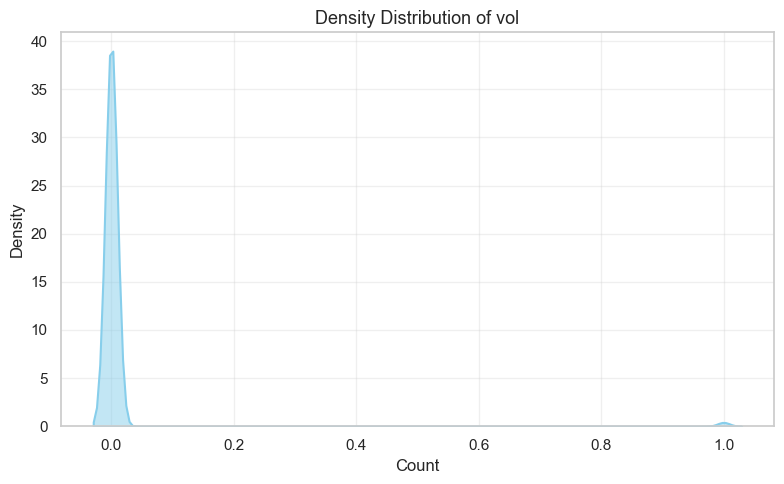

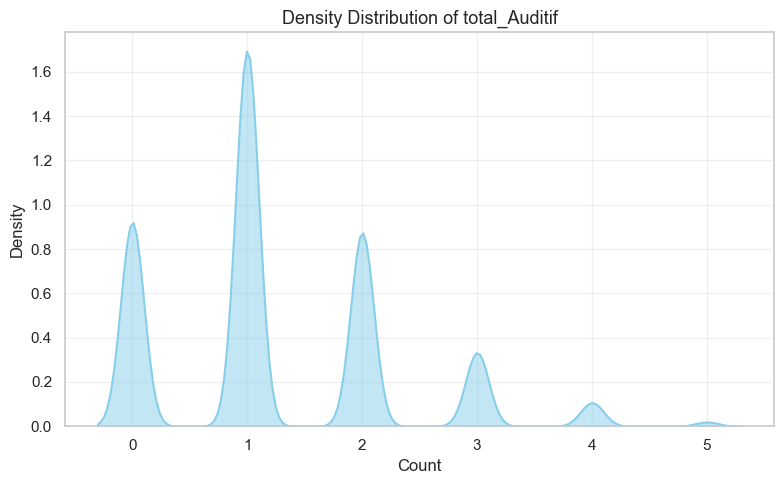

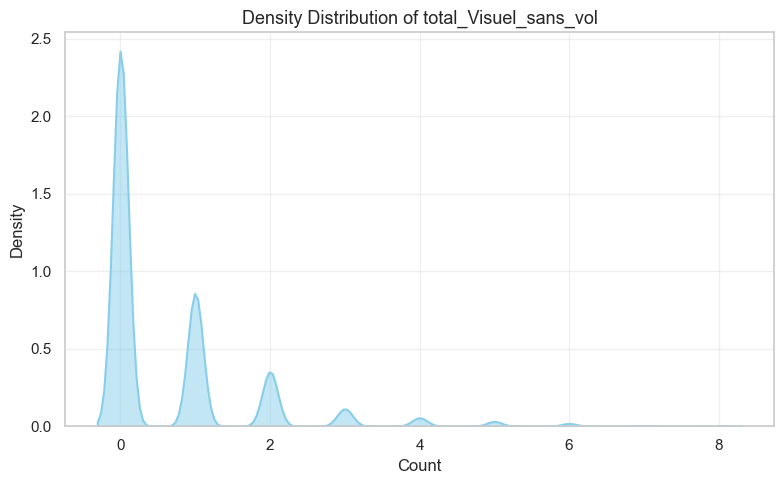

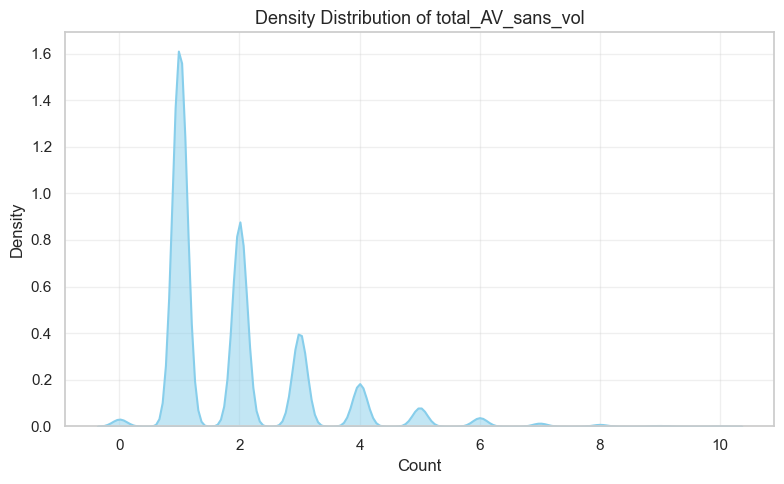

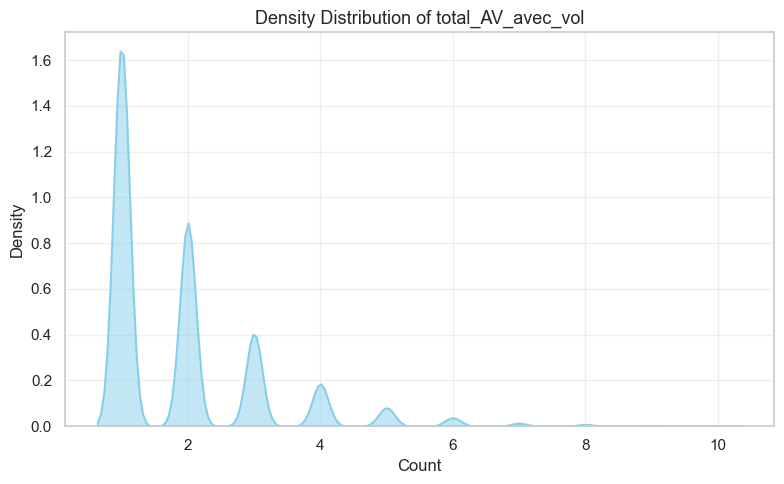

In [129]:
# %% [markdown]
# ## 各计数指标的密度图 / Density plots for each count variable
# 由于存在大量0值，因此箱线图效果不佳，改用密度图展示单个变量分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set Seaborn style
sns.set(style="whitegrid")

# 遍历每一个计数列 / Loop through each count variable
for col in count_cols:
    plt.figure(figsize=(8, 5))
    
    # 绘制密度图 / Draw KDE plot for current variable
    sns.kdeplot(
        data=obs_data_no_outliers,
        x=col,
        fill=True,
        color='skyblue',
        alpha=0.5,
        linewidth=1.5
    )
    
    # 添加标题和标签 / Add titles and labels
    plt.title(f"Density Distribution of {col}", fontsize=13)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

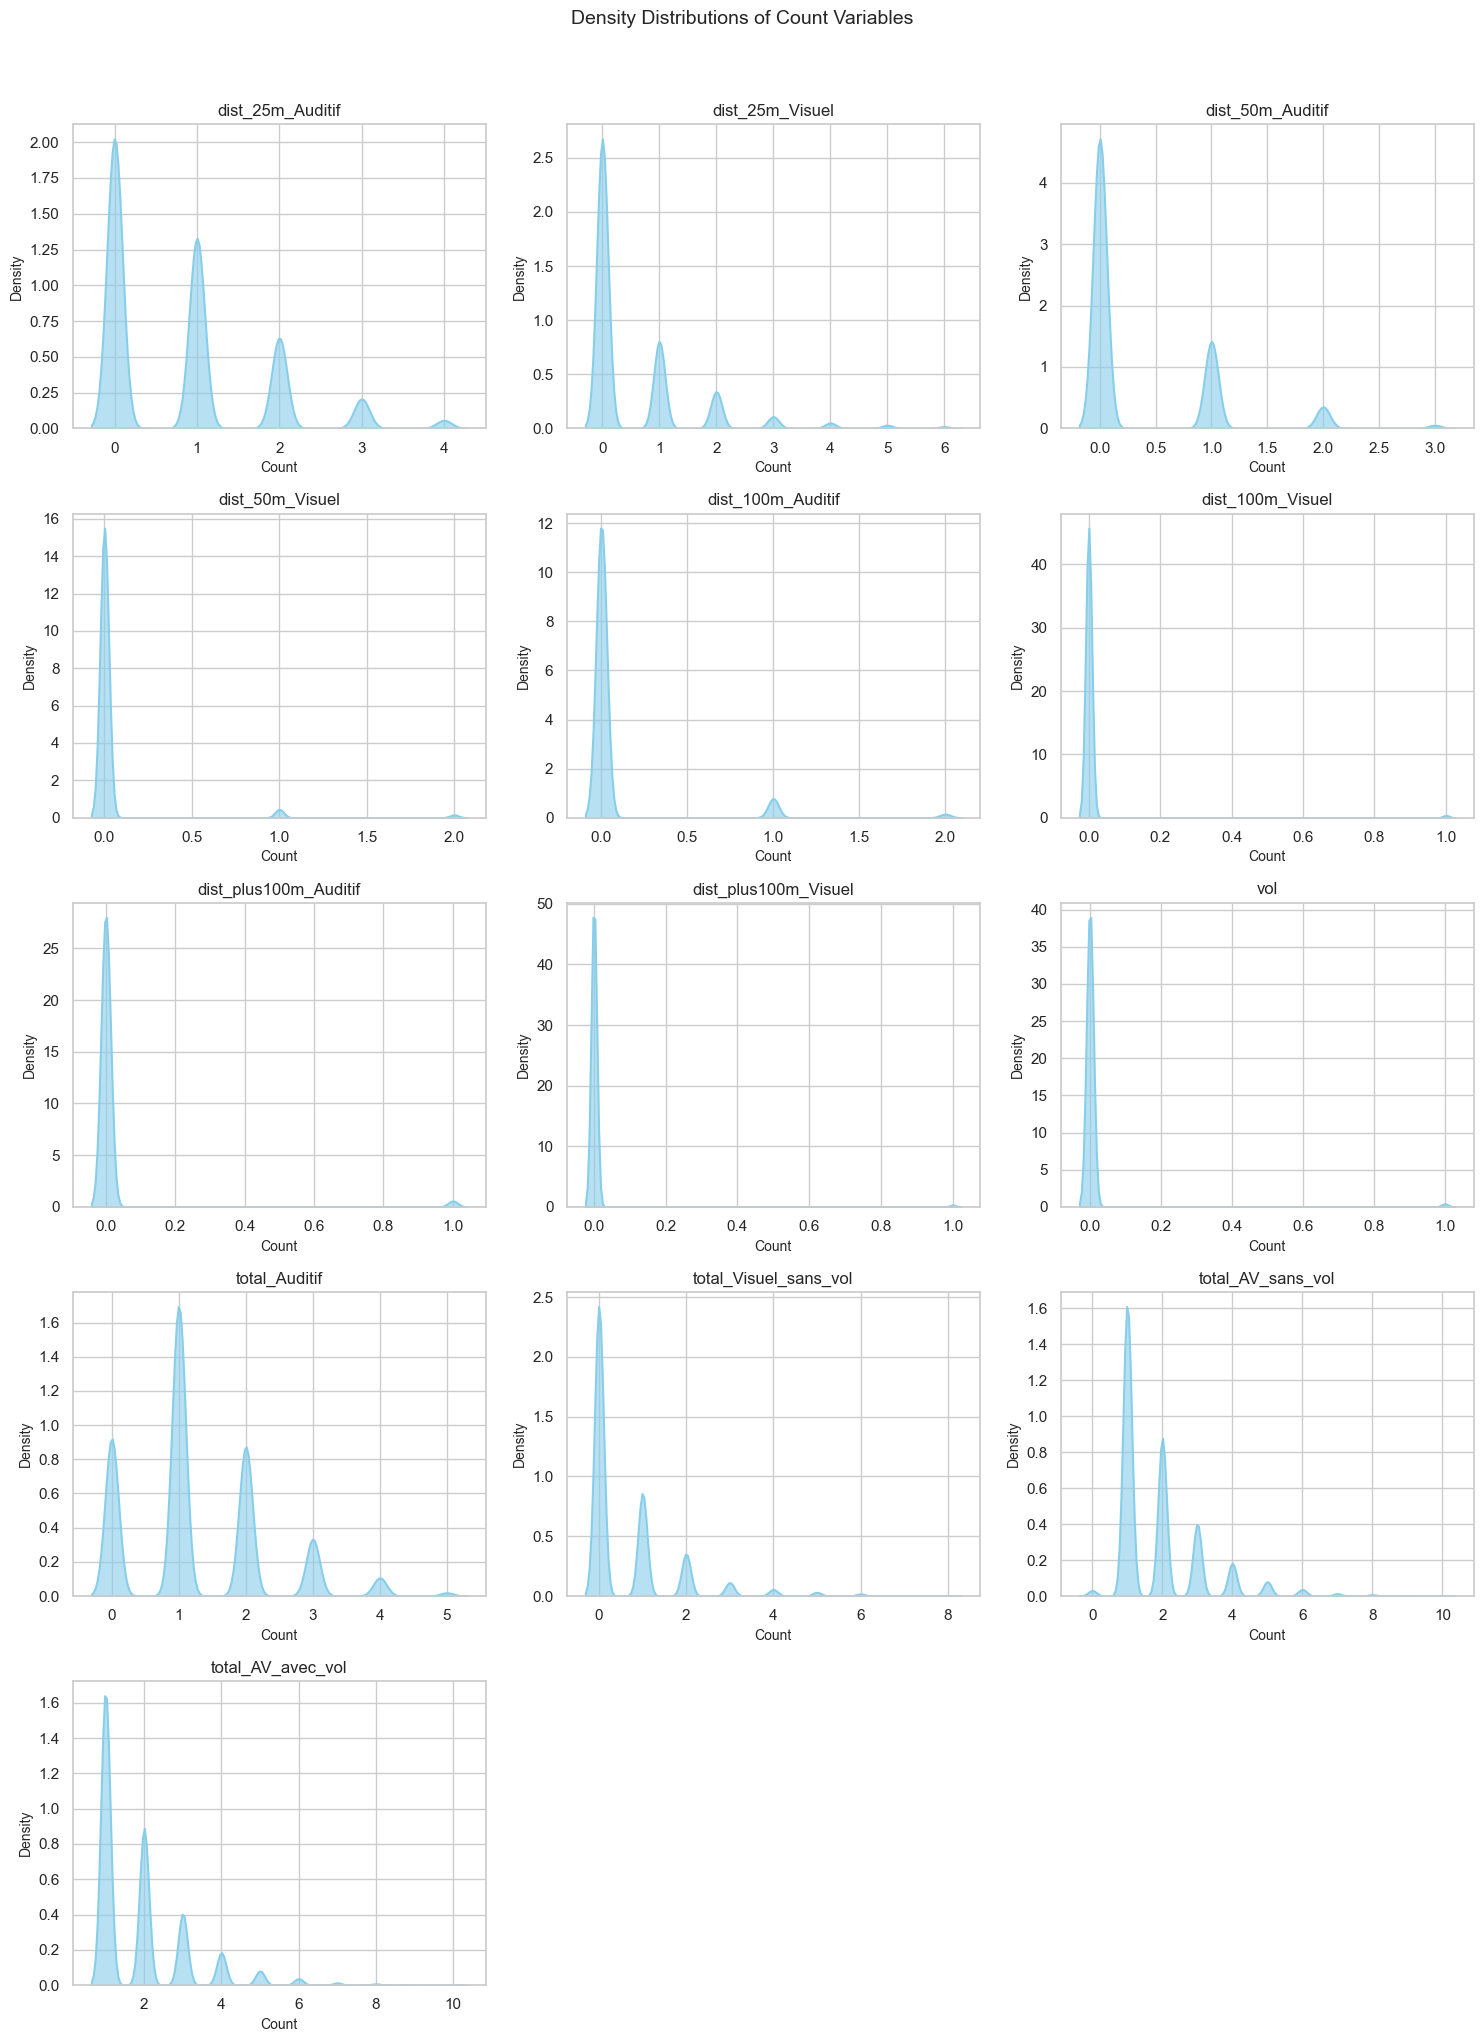

In [131]:
# %% [markdown]
# ## 各计数指标的密度图（多图布局）  
# ## Density plots for all count variables (grid layout)

# %%
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置绘图风格 / Set Seaborn style
sns.set(style="whitegrid")

# 计算网格行列数 / Compute number of rows and columns
n_cols = 3
n_rows = int(np.ceil(len(count_cols) / n_cols))

# 创建子图布局 / Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # 展平索引方便遍历 / Flatten axes for easy indexing

# 遍历所有计数列并绘图 / Loop through count columns and plot KDE
for i, col in enumerate(count_cols):
    sns.kdeplot(
        data=obs_data_no_outliers,
        x=col,
        fill=True,
        color='skyblue',
        alpha=0.6,
        linewidth=1.5,
        ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Count", fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)

# 隐藏空子图（如果列数不是3的倍数）/ Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# 全局标题与布局优化 / Adjust layout
plt.suptitle("Density Distributions of Count Variables", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

1️⃣ Observation Effort / 观测努力量
	•	指标定义：每年每条样线或总样线的观测次数（number of observations per year）
	•	选择理由：
	1.	能反映每年的调查活动强度，直接影响计数结果可靠性。
	2.	观测努力量变化会影响物种丰富度和数量的估计，如果不考虑努力量差异，可能误判生物多样性趋势。
	3.	易于量化，并且数据可直接从 obs_data 的 date 列和样线列计算。


2️⃣ Species Richness / 物种丰富度
	•	指标定义：每年被观测到的不同物种数量（unique species per year）
	•	选择理由：
	1.	物种丰富度是生态学常用的多样性指标，能反映生态系统状态和变化。
	2.	随着时间推移，物种数量的变化可以反映长期环境或保护措施的效果。
	3.	对应数据列为 ESPECE，可按年份聚合统计不同物种的数量。


3️⃣ Average Abundance / 平均数量（计数指标）
	•	指标定义：每年每条样线或每点位的平均鸟类数量（例如 total_AV_avec_vol 平均值）
	•	选择理由：
	1.	反映物种总体数量变化趋势，比单纯物种丰富度更能反映个体数量动态。
	2.	可以结合观测努力量进行标准化（如每次观测平均数量），减少不同年份观测差异影响。
	3.	数据列可选择总计列 total_AV_avec_vol 或分距离计数列综合计算。


总结

指标	数据来源	生态学意义	统计意义
Observation Effort / 观测努力量	Nom_transect, date	反映每年的调查活动强度	影响计数可靠性，可作为标准化因子
Species Richness / 物种丰富度	ESPECE	衡量生物多样性	可量化年度多样性变化
Average Abundance / 平均数量	total_AV_avec_vol	反映物种总体数量动态	可标准化、用于趋势分析




In [80]:
# %% [markdown]
# # 1️⃣ Observation Effort / 观测努力量
# Compute annual observation effort with 95% confidence interval and visualize trend
# 计算年度观测努力量，并估计95%置信区间，可视化年度趋势

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# %% [markdown]
# ## Prepare data / 数据准备

# %%
# Extract year from date / 提取年份
obs_data['year'] = obs_data['date'].dt.year

# %% [markdown]
# ## Compute annual observation effort / 计算年度观测努力量

# %%
# Count number of observations per year / 每年观测记录数
effort_by_year = obs_data.groupby('year').size().reset_index()
effort_by_year.columns = ['year', 'obs_effort']
effort_by_year

# %% [markdown]
# ## Compute 95% CI using bootstrap / 使用 bootstrap 估计 95% 置信区间

# %%
def bootstrap_ci(series, n_boot=1000, ci=95):
    """Compute bootstrap confidence interval / 使用 bootstrap 计算置信区间"""
    series = series.dropna()
    boot_samples = [series.sample(frac=1, replace=True).count() for _ in range(n_boot)]
    lower = np.percentile(boot_samples, (100-ci)/2)
    upper = np.percentile(boot_samples, 100 - (100-ci)/2)
    return lower, upper

# Apply bootstrap CI for each year / 对每年计算置信区间
ci_bounds = effort_by_year['year'].apply(lambda y: bootstrap_ci(obs_data[obs_data['year']==y].index))
effort_by_year['ci_lower'] = [x[0] for x in ci_bounds]
effort_by_year['ci_upper'] = [x[1] for x in ci_bounds]

effort_by_year

# %% [markdown]
# ## Visualize trend / 可视化年度趋势

# %%
plt.figure(figsize=(12, 6))
plt.fill_between(effort_by_year['year'], effort_by_year['ci_lower'], effort_by_year['ci_upper'], color='skyblue', alpha=0.3, label='95% CI / 置信区间')
plt.plot(effort_by_year['year'], effort_by_year['obs_effort'], marker='o', color='blue', label='Observation Effort / 观测努力量')
plt.xlabel("Year / 年份", fontsize=12)
plt.ylabel("Number of Observations / 观测记录数", fontsize=12)
plt.title("Annual Observation Effort / 年度观测努力量", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## Trend analysis / 趋势分析

# %%
# Fit simple linear regression / 拟合简单线性回归
X = effort_by_year['year'].values.reshape(-1, 1)
y = effort_by_year['obs_effort'].values
model = LinearRegression().fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear trend slope / 线性趋势斜率: {slope:.2f} observations per year / 每年观测记录数变化")

# Plot trend line / 绘制线性趋势
plt.figure(figsize=(12, 6))
plt.fill_between(effort_by_year['year'], effort_by_year['ci_lower'], effort_by_year['ci_upper'], color='skyblue', alpha=0.3, label='95% CI / 置信区间')
plt.plot(effort_by_year['year'], effort_by_year['obs_effort'], marker='o', color='blue', label='Observation Effort / 观测努力量')
plt.plot(effort_by_year['year'], model.predict(X), color='red', linestyle='--', label='Linear Trend / 线性趋势')
plt.xlabel("Year / 年份", fontsize=12)
plt.ylabel("Number of Observations / 观测记录数", fontsize=12)
plt.title("Annual Observation Effort with Trend / 年度观测努力量及趋势", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

AttributeError: 'Index' object has no attribute 'sample'